```
conda install -c conda-forge scikit-learn pandas
```

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn
import seaborn as sns

### Primera actividad de redes neuronales

In [3]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X_data = cancer.data
y_data = cancer.target

(https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html#sklearn.datasets.load_breast_cancer)
- En el siguiente bloque explore la data, con el fin de responder a estas preguntas.
    - ¿De que se trata el dataset?
    - ¿Cuales son las clases de salida?
    - ¿A que corresponden las caracteristicas?
    - ¿Cuantas caracteristicas y clases de salida hay?
    - Etc.

In [4]:
# Ver las primera filas del dataset para ver de que se trata
df = pd.DataFrame(cancer.data,columns=cancer.feature_names)
print(f"tamaño del dataset: {df.shape}")
descripcion = cancer.DESCR
df['target'] = cancer.target

df.head()

tamaño del dataset: (569, 30)


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


### Entendiendo el dataset
Al ver los datos que tenemos a simple vista como; el nombre del dataset, los nombres de las columnas y al ver el enlace adjunto podemos concluir que este conjunto de datos se usa para entrenar un modelo que pueda predecir la existencia o no de cancer de mama en algun paciente con x sintomas. En este caso es facil decir cuales son las clases de salida puesto que por sentido común podmeos decir que si alguien tiene cancer o no tiene, no existen punto medios.
Las caracteristicas son datos sacados de mediciones hechas a pacientes con sospechas de cancer de mama, en esos examenes se miden caracteriticas como:
-Radio (mean radius)
-Textura (mean texture)
-Perímetro (mean perimeter)
-Área (mean area)
-Suavidad (mean smoothness)
-Compacidad (mean compactness)
-Etc...
De estas caracteristicas hay 30.

In [5]:
# ver descripcion presente en el dataset
print(descripcion)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 569

:Number of Attributes: 30 numeric, predictive attributes and the class

:Attribute Information:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)

    The mean, standard error, and "worst" or largest (mean of the three
    worst/largest values) of these features were computed for each image,
    resulting in 30 features.  For instance, field 0 is Mean Radius, field
    10 is Radius SE, field 20 is Worst Radius.

    - 

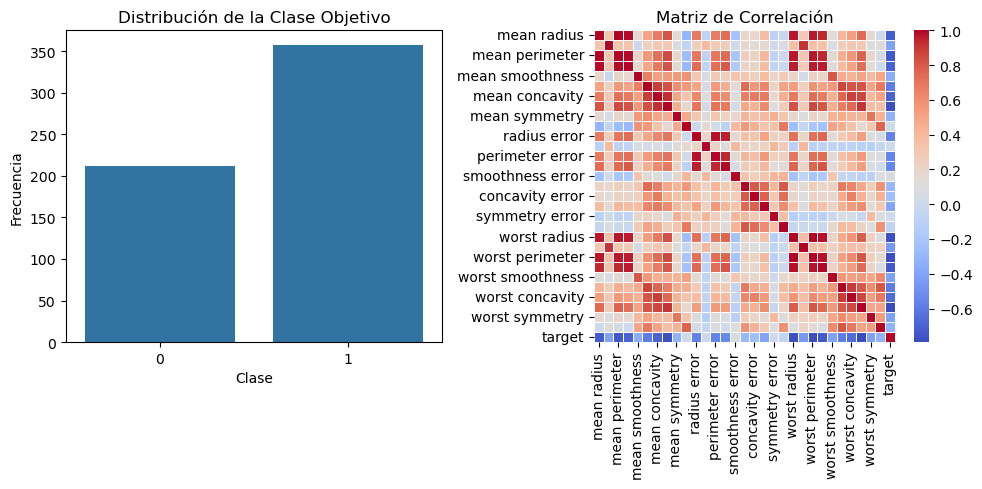

(       mean radius  mean texture  mean perimeter    mean area  \
 count   569.000000    569.000000      569.000000   569.000000   
 mean     14.127292     19.289649       91.969033   654.889104   
 std       3.524049      4.301036       24.298981   351.914129   
 min       6.981000      9.710000       43.790000   143.500000   
 25%      11.700000     16.170000       75.170000   420.300000   
 50%      13.370000     18.840000       86.240000   551.100000   
 75%      15.780000     21.800000      104.100000   782.700000   
 max      28.110000     39.280000      188.500000  2501.000000   
 
        mean smoothness  mean compactness  mean concavity  mean concave points  \
 count       569.000000        569.000000      569.000000           569.000000   
 mean          0.096360          0.104341        0.088799             0.048919   
 std           0.014064          0.052813        0.079720             0.038803   
 min           0.052630          0.019380        0.000000             0.0000

In [6]:
# Estadísticas descriptivas
stats_descriptives = df.describe()
# Distribución de la clase objetivo
target_distribution = df['target'].value_counts()

# Matriz de correlación
correlation_matrix = df.corr()

# Visualizaciones
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.countplot(x='target', data=df)
plt.title('Distribución de la Clase Objetivo')
plt.xlabel('Clase')
plt.ylabel('Frecuencia')
plt.subplot(1, 2, 2)
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title('Matriz de Correlación')
plt.tight_layout()
plt.show()

stats_descriptives, target_distribution

La mayoría de entradas son benignas (357 vs 212 )
La matriz de correlación muestra que algunas características tienen correlaciones fuertes , lo que puede ser útil para la selección de características o la reducción de dimensionalidad en análisis posteriores.

In [7]:
import torch
from torch.utils.data import random_split,DataLoader,TensorDataset

X = torch.tensor(X_data, dtype=torch.float32)
Y = torch.tensor(y_data,dtype=torch.long)

dataset = TensorDataset(X,Y)

train_set, valid_set,test_set = random_split(dataset,[342,113,114],generator=torch.Generator().manual_seed(1234)) ##No cambiar la semilla
train_loader = DataLoader(train_set, shuffle=True, batch_size=32)
valid_loader = DataLoader(valid_set, shuffle=False, batch_size=128)
test_loader = DataLoader(test_set, shuffle=False, batch_size=128)

## Implentación de la Red Neuronal
- En el siguiente bloque implemente el modelo que utilizará su red neuronal para predecir si un paciente tiene cáncer o no, teniendo en cuenta sus caracteristicas.

In [11]:
import torch.nn as nn
class MiClase(nn.Module):
    def __init__(self):
        super(MiClase, self).__init__()
        self.hidden = nn.Linear(30, 16)  # Capa de entrada de 30 características a 16 neuronas ocultas
        self.hidden2 = nn.Linear(16,8) # De 16 neuronas ocultas a 8
        self.output = nn.Linear(8, 1) # Capa de salida a 1 neurona
        self.activation = nn.ReLU()
    def forward(self, x):
        x = self.hidden(x)
        x = self.activation(x)
        x = self.hidden2(x)
        x= self.activation(x)
        x = self.output(x)
        return x


- En el siguiente bloque cree una instancia de su red neuronal definida anteriormente y defina una función de pérdida y optimizador adecuados:

In [12]:
model = MiClase()
criterion = nn.BCEWithLogitsLoss()  # Para problemas de clasificación binaria
optimizer = torch.optim.Adam(model.parameters(), lr=1e-2)

- Responda: 
    - ¿Porqué eligió esa función de pérdida?
        - ...
    - Elija 2 optimizadores populares y describalos, luego explique porqué elige uno de los 2.
        - ...   

- En el siguiente bloque programe el entrenamiento de su red neuronal

In [13]:
from tqdm import tqdm

num_epochs = 100
model = MiClase()
criterion = nn.BCEWithLogitsLoss()  
optimizer = torch.optim.Adam(model.parameters(), lr=1e-2)

running_loss = np.zeros((num_epochs,2))
for epoch in tqdm(range(num_epochs)):
    model.train()
    train_loss = 0.0
    for minibatch in train_loader:
        optimizer.zero_grad()
        x_batch, y_batch = minibatch
        outputs = model(x_batch)
        loss = criterion(outputs.squeeze(), y_batch.float())
        loss.backward()
        optimizer.step()
        train_loss += loss.item()

    model.eval()
    valid_loss = 0.0
    with torch.no_grad():
        for minibatch in valid_loader:
            x_batch, y_batch = minibatch
            outputs = model(x_batch)
            loss = criterion(outputs.squeeze(), y_batch.float())
            valid_loss += loss.item()
    
    running_loss[epoch] = [train_loss / len(train_loader), valid_loss / len(valid_loader)]
    
    if epoch % 10 == 0:
        print(f'Epoch {epoch} Train Loss: {train_loss / len(train_loader):.4f}, Valid Loss: {valid_loss / len(valid_loader):.4f}')

  6%|▌         | 6/100 [00:00<00:03, 28.81it/s]

Epoch 0 Train Loss: 0.6999, Valid Loss: 0.5850


 14%|█▍        | 14/100 [00:00<00:02, 30.34it/s]

Epoch 10 Train Loss: 0.3437, Valid Loss: 0.3904


 24%|██▍       | 24/100 [00:01<00:03, 20.89it/s]

Epoch 20 Train Loss: 0.3087, Valid Loss: 0.2916


 34%|███▍      | 34/100 [00:01<00:02, 25.67it/s]

Epoch 30 Train Loss: 0.2121, Valid Loss: 0.2455


 47%|████▋     | 47/100 [00:01<00:02, 25.84it/s]

Epoch 40 Train Loss: 0.1880, Valid Loss: 0.1869


 56%|█████▌    | 56/100 [00:02<00:01, 31.38it/s]

Epoch 50 Train Loss: 0.1778, Valid Loss: 0.1825


 64%|██████▍   | 64/100 [00:02<00:01, 28.19it/s]

Epoch 60 Train Loss: 0.1847, Valid Loss: 0.1776


 76%|███████▌  | 76/100 [00:02<00:00, 27.93it/s]

Epoch 70 Train Loss: 0.1870, Valid Loss: 0.5232


 85%|████████▌ | 85/100 [00:03<00:00, 20.42it/s]

Epoch 80 Train Loss: 0.2033, Valid Loss: 0.2350


 94%|█████████▍| 94/100 [00:03<00:00, 19.98it/s]

Epoch 90 Train Loss: 0.1708, Valid Loss: 0.1955


100%|██████████| 100/100 [00:04<00:00, 24.16it/s]


- En el sigueinte bloque muestre el gráfico de entrenamiento y validación.
- ¿El entrenamiento de su red neuronal está "listo"?

- En el siguiente bloque evalue que tan bueno es su modelo mediante diferentes métricas

Accuracy: 0.9561
Precision: 0.9518
Recall: 0.9875
F1 Score: 0.9693
AUC: 0.9926


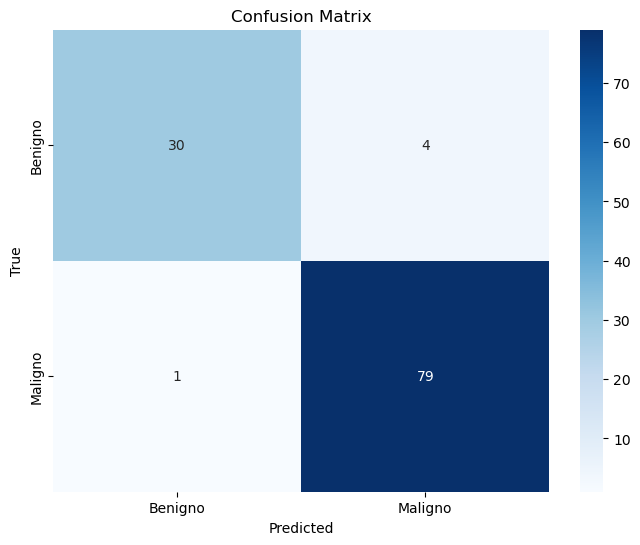

In [14]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

model.eval()
y_true = []
y_pred = []
y_prob = []

with torch.no_grad():
    for minibatch in test_loader:
        x_batch, y_batch = minibatch
        outputs = model(x_batch).squeeze()
        probabilities = torch.sigmoid(outputs)
        predictions = (probabilities > 0.5).long()
        
        y_true.extend(y_batch.tolist())
        y_pred.extend(predictions.tolist())
        y_prob.extend(probabilities.tolist())

# Convertir listas a numpy arrays
y_true = np.array(y_true)
y_pred = np.array(y_pred)
y_prob = np.array(y_prob)

# Calcular métricas
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)
auc = roc_auc_score(y_true, y_prob)

print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')
print(f'AUC: {auc:.4f}')

# Calcular la matriz de confusión
cm = confusion_matrix(y_true, y_pred)
cm_display_labels = ['Benigno', 'Maligno']

# Visualizar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=cm_display_labels, yticklabels=cm_display_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


- Concluya sobre su trabajo.  
- Responda
    - ¿Qué tan confiable sería su modelo en un entorno clínico? 
    - ¿Qué haría para mejorarlo?
    - Sobre la matriz de confusión, ¿Alguno de sus elementos son más importantes que otros en este caso?
    ¿Que significaría el aumento de FN o FP en este caso? 
- Investigue sobre alguna arquitectura de red neuronal distinta a la utilizada en este trabajo, describala y explique en que casos sería útil.



### Pregunta Bonus
- ¿Cúal es la principal limitación de las redes neuronales comparado al cerebro humano?

In [17]:
from tqdm import tqdm

num_epochs = 100
model = nn.Sequential(
    nn.Linear(30, 16),  # Capa de entrada de 30 características a 16 neuronas ocultas
    nn.ReLU(),
    nn.Linear(16, 8),   # De 16 neuronas ocultas a 8
    nn.ReLU(),
    nn.Linear(8, 1)     # Capa de salida a 1 neurona (predicción binaria)
)
criterion = nn.BCEWithLogitsLoss()  # Para problemas de clasificación binaria
optimizer = optim.Adam(model.parameters(), lr=1e-2)


running_loss = np.zeros((num_epochs,2))
for epoch in tqdm(range(num_epochs)):
    model.train()
    train_loss = 0.0
    for minibatch in train_loader:
        optimizer.zero_grad()
        x_batch, y_batch = minibatch
        outputs = model(x_batch)
        loss = criterion(outputs.squeeze(), y_batch.float())
        loss.backward()
        optimizer.step()
        train_loss += loss.item()

    model.eval()
    valid_loss = 0.0
    with torch.no_grad():
        for minibatch in valid_loader:
            x_batch, y_batch = minibatch
            outputs = model(x_batch)
            loss = criterion(outputs.squeeze(), y_batch.float())
            valid_loss += loss.item()
    
    running_loss[epoch] = [train_loss / len(train_loader), valid_loss / len(valid_loader)]
    
    if epoch % 10 == 0:
        print(f'Epoch {epoch} Train Loss: {train_loss / len(train_loader):.4f}, Valid Loss: {valid_loss / len(valid_loader):.4f}')


  3%|▎         | 3/100 [00:00<00:09, 10.47it/s]

Epoch 0 Train Loss: 0.5079, Valid Loss: 0.2864


 14%|█▍        | 14/100 [00:00<00:05, 15.56it/s]

Epoch 10 Train Loss: 0.0276, Valid Loss: 0.0386


 24%|██▍       | 24/100 [00:01<00:04, 18.71it/s]

Epoch 20 Train Loss: 0.0089, Valid Loss: 0.0252


 34%|███▍      | 34/100 [00:02<00:04, 15.94it/s]

Epoch 30 Train Loss: 0.0041, Valid Loss: 0.0287


 42%|████▏     | 42/100 [00:02<00:03, 15.08it/s]

Epoch 40 Train Loss: 0.0011, Valid Loss: 0.0280


 53%|█████▎    | 53/100 [00:03<00:03, 15.56it/s]

Epoch 50 Train Loss: 0.0006, Valid Loss: 0.0272


 63%|██████▎   | 63/100 [00:03<00:01, 19.04it/s]

Epoch 60 Train Loss: 0.0004, Valid Loss: 0.0280


 73%|███████▎  | 73/100 [00:04<00:01, 16.89it/s]

Epoch 70 Train Loss: 0.0003, Valid Loss: 0.0304


 83%|████████▎ | 83/100 [00:05<00:01, 16.88it/s]

Epoch 80 Train Loss: 0.0002, Valid Loss: 0.0323


 95%|█████████▌| 95/100 [00:05<00:00, 18.89it/s]

Epoch 90 Train Loss: 0.0003, Valid Loss: 0.0330


100%|██████████| 100/100 [00:06<00:00, 16.34it/s]


Accuracy: 0.9710
Precision: 0.9783
Recall: 0.9783
F1 Score: 0.9783
AUC: 0.9991


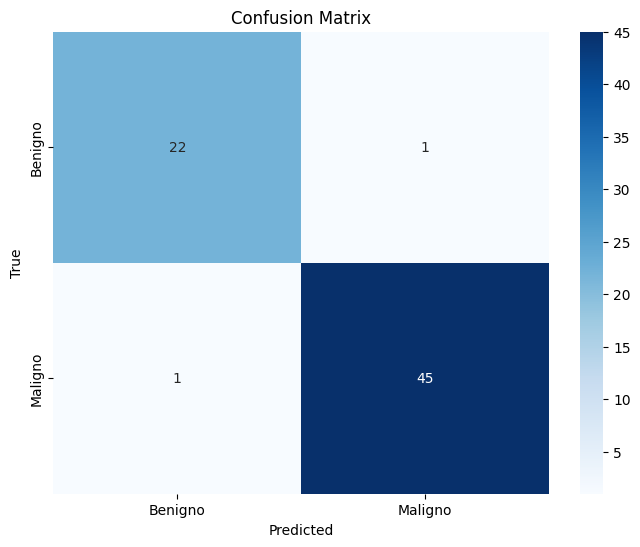

In [19]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

model.eval()
y_true = []
y_pred = []
y_prob = []

with torch.no_grad():
    for minibatch in test_loader:
        x_batch, y_batch = minibatch
        outputs = model(x_batch).squeeze()
        probabilities = torch.sigmoid(outputs)
        predictions = (probabilities > 0.5).long()
        
        y_true.extend(y_batch.tolist())
        y_pred.extend(predictions.tolist())
        y_prob.extend(probabilities.tolist())

# Convertir listas a numpy arrays
y_true = np.array(y_true)
y_pred = np.array(y_pred)
y_prob = np.array(y_prob)

# Calcular métricas
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)
auc = roc_auc_score(y_true, y_prob)

print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')
print(f'AUC: {auc:.4f}')

# Calcular la matriz de confusión
cm = confusion_matrix(y_true, y_pred)
cm_display_labels = ['Benigno', 'Maligno']

# Visualizar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=cm_display_labels, yticklabels=cm_display_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

